# import packages and files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

In [2]:
train=pd.read_csv('train.csv')

In [3]:
valid=pd.read_csv('MLProject_valid.csv')

In [5]:
test=pd.read_csv('MLProject_test.csv')

In [8]:
sum(test.isnull().sum()), #only the two targets are missing
sum(valid.isnull().sum())

0

In [1]:
train.info(),valid.info() #all variables are either float or int

NameError: name 'train' is not defined

In [12]:
train.dtypes[train.dtypes=='object'] #no objects

Series([], dtype: object)

## dummy code z2

In [8]:
z=pd.get_dummies(train['Z2'], prefix='Z')

In [9]:
train=train.join(z)

In [10]:
del train['Z2']

## validation data

In [11]:
z=pd.get_dummies(valid['Z2'], prefix='Z')
valid=valid.join(z)
del valid['Z2']

In [12]:
valid.head()

,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,...,V6,W6,X6,target1,target2,Z_1,Z_2,Z_3,Z_4,Z_5
0,11759,7.3100,15.93,17.27,0.922409,0.033946,0.024527,-0.015488,98.019802,-24.803338,...,0.1882,0.1868,0.094,1,0,0,0,0,1,0
1,340972,7.3000,15.93,17.27,0.922409,0.032532,0.020979,-0.015960,96.428571,-22.863123,...,0.1882,0.1868,0.094,1,0,0,0,0,1,0
2,124449,7.2890,16.18,17.58,0.920364,0.026620,0.020868,-0.015000,79.464286,-32.661392,...,0.1882,0.1868,0.094,1,1,0,0,0,1,0
3,115759,7.2599,16.17,17.56,0.920843,0.018933,0.018233,-0.018932,-67.857143,38.424656,...,0.1882,0.1868,0.094,1,1,0,0,0,1,0
4,127702,7.2800,16.18,17.57,0.920888,0.019608,0.015342,-0.013644,-75.784753,36.119851,...,0.1882,0.1868,0.094,1,1,0,0,0,1,0


In [43]:
#inspect the categorical Z2
train['Z2'].describe(),
#valid['Z2'].describe()
#it's float in python

(count    483087.000000
 mean          3.030347
 std           1.419200
 min           1.000000
 25%           2.000000
 50%           3.000000
 75%           4.000000
 max           5.000000
 Name: Z2, dtype: float64,)

In [13]:
train.loc[:,('target1','target2')]

,target1,target2
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
483082,0,1
483083,0,0
483084,0,1
483085,0,0


# EDA

## checking for outliers (for scaler selection)

In [9]:

from scipy.stats import zscore

In [10]:

train_zscores=train.apply(zscore) #zscore on each column

In [22]:
sum(abs(train_zscores).max()>3) #so 83 variables have potential outliers."" RobustScaler"

83

In [26]:
max_1=pd.DataFrame(train_zscores.max())

In [33]:
max_1[abs(max_1.iloc[:, 0])>3] #those are the variables

,0
A1,35.374666
B1,5.003706
C1,9.929467
D1,284.352291
E1,9.076999
...,...
K6,3.705144
P6,4.615266
Q6,3.803054
R6,6.871571


# Prep the data

## dropping missing values

In [14]:
#dropping missing values
train=train.dropna()

## save targets to labels

In [15]:
# Labels are the values we want to predict
labels = train.loc[:,'target1': 'target2']



In [16]:
labels

,target1,target2
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
483082,0,1
483083,0,0
483084,0,1
483085,0,0


In [108]:
sum(labels['target1'])/len(labels['target1']) # not a rare event but might want to balance the data in models...

0.15619960793811466

## Remove target from train

In [17]:
#remove target variable from the dataset

train= train.drop(['target1', 'target2'], axis = 1)

train.shape

(482697, 152)

In [18]:
# Saving column names for later use
train_list = list(train.columns)
# Convert to numpy array
train_list_array = np.array(train_list)

In [34]:
# Saving column names for later use
valid_list = list(valid.columns)
# Convert to numpy array
valid_list_array = np.array(valid_list)

In [35]:
len(valid_list)

152

## Remove target from valid

In [20]:
labels_valid=valid.loc[:,'target1': 'target2']

In [21]:
valid= valid.drop(['target1', 'target2'], axis = 1)
valid.shape

(60000, 152)

In [22]:
target1=labels.iloc[:,0]
target2=labels.iloc[:,1]
valid_target1=labels_valid.iloc[:,0]
valid_target2=labels_valid.iloc[:,1]

# Data Cleaning/Prep

In [14]:
train.shape

(482697, 148)

In [24]:
483087-482697 #match

390

## Feature scaling

In [23]:
from sklearn.preprocessing import  RobustScaler


In [24]:
scaler =  RobustScaler() #scale to ensure models are properly trained. 
scaled_train = scaler.fit_transform(train) #mean=1,sd=1
scaled_valid = scaler.fit_transform(valid)
  #put back column names


In [32]:
scaled_train=pd.DataFrame(scaled_train) #from array to dataframe
scaled_train.columns=train_list  #put back column names


In [36]:
scaled_valid=pd.DataFrame(scaled_valid) #from array to dataframe
scaled_valid.columns=valid_list

In [36]:
scaled_train.head()

,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,...,N6,P6,Q6,R6,S6,T6,U6,V6,W6,X6
0,0.341847,-0.672392,-0.242574,-0.311429,-0.032197,1.143799,0.149105,-0.453127,-0.383482,0.145799,...,-0.592965,-0.641634,-0.420792,-0.557823,-0.759398,0.370909,-0.486979,-0.743094,-0.633609,0.174107
1,1.342706,-0.504132,0.163366,0.017143,0.384614,0.830537,-1.579693,-1.344336,1.008064,-0.632131,...,0.565327,0.396574,0.211221,0.428571,0.273183,0.747273,0.580729,0.513812,0.559229,0.678571
2,-0.526862,-0.754002,0.138614,0.014286,0.325048,-0.243961,0.014936,0.438117,-0.312467,0.187255,...,-0.007538,-0.148880,-0.013201,-0.190476,-0.050125,0.727273,-0.208333,-0.060773,-0.143251,0.542411
3,-0.266560,-0.524271,0.579208,0.754286,0.004139,-0.434602,0.684249,-0.555044,0.892334,-0.705060,...,0.454774,0.823452,0.570957,1.569161,1.117794,0.156364,0.333333,0.337017,0.338843,0.089286
4,-0.503748,-0.755535,0.074257,-0.100000,0.394178,-0.376840,-0.883188,0.380751,0.984271,-0.804356,...,-0.010050,-0.135705,0.090759,-0.086168,-0.050125,-0.220000,-0.429687,0.093923,-0.184573,-0.390625


In [37]:
scaled_valid.head()

,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,...,T6,U6,V6,W6,X6,Z_1,Z_2,Z_3,Z_4,Z_5
0,-0.521765,-1.918624,0.453668,0.533923,0.311420,3.446070,1.066087,-0.047210,1.028073,-0.558668,...,0.154605,0.529319,0.525217,0.555189,0.456075,0.0,0.0,0.0,1.0,0.0
1,3.619110,-1.919290,0.453668,0.533923,0.311420,3.303102,0.922114,-0.051885,1.011383,-0.539528,...,0.154605,0.529319,0.525217,0.555189,0.456075,0.0,0.0,0.0,1.0,0.0
2,0.895661,-1.920024,0.501931,0.625369,0.293510,2.705516,0.917623,-0.042376,0.833455,-0.636188,...,0.154605,0.529319,0.525217,0.555189,0.456075,0.0,0.0,0.0,1.0,0.0
3,0.786358,-1.921965,0.500000,0.619469,0.297704,1.928589,0.810686,-0.081314,-0.711714,0.065074,...,0.154605,0.529319,0.525217,0.555189,0.456075,0.0,0.0,0.0,1.0,0.0
4,0.936578,-1.920624,0.501931,0.622419,0.298099,1.996767,0.693356,-0.028947,-0.794862,0.042337,...,0.154605,0.529319,0.525217,0.555189,0.456075,0.0,0.0,0.0,1.0,0.0


# Establish a baseline model

In [23]:
# The baseline model is the logistic regression
from sklearn.linear_model import LogisticRegression

In [46]:
log_reg = LogisticRegression(solver='lbfgs')


In [37]:
scaled_train.shape,len(labels.iloc[:,0])

((482697, 148), 482697)

## LR-Target1

In [22]:
from sklearn.utils.class_weight import compute_sample_weight

sample_weight=compute_sample_weight(class_weight='balanced',y=labels.iloc[:,0])

In [30]:
from sklearn.metrics import precision_score

# log_reg.fit(scaled_train, labels.iloc[:,0], sample_weight=sample_weight) #use target1
# logreg_predictions1 = log_reg.predict(scaled_valid)
# log_preci_tar1 = precision_score(labels_valid.iloc[:,0], logreg_predictions1)
# log_preci_tar1  #baseline precision on target1


In [42]:
#roc?
from sklearn.metrics import roc_auc_score
roc_auc_score(labels_valid.iloc[:,0], logreg_predictions1)

0.5012847250841059

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(labels_valid.iloc[:,0], logreg_predictions1)

array([[22685, 22628],
       [ 7315,  7372]], dtype=int64)

###  Do not balance the target 

In [43]:
log_reg.fit(scaled_train, labels.iloc[:,0]) #use target1
logreg_predictions1_s = log_reg.predict(scaled_valid)
precision_score(labels_valid.iloc[:,0], logreg_predictions1_s)


C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.24383333333333335

## LR-target2


In [39]:
log_reg.fit(scaled_train, labels.iloc[:,1], sample_weight=compute_sample_weight(class_weight='balanced',y=labels.iloc[:,0])) #use target1
logreg_predictions2 = log_reg.predict(scaled_valid)
log_preci_tar2 = precision_score(labels_valid.iloc[:,1], logreg_predictions2)
log_preci_tar2

C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.2594666666666667

# Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
tree_reg1 = DecisionTreeClassifier(max_depth=3)
tree_reg1.fit(scaled_train, labels.iloc[:,0], sample_weight=sample_weight)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
treepredic1= tree_reg1.predict(scaled_valid)
precision_score(labels_valid.iloc[:,0], treepredic1)

0.44101085015794533

In [78]:
tree_2 = DecisionTreeClassifier(max_depth=6)
tree_2.fit(scaled_train, labels.iloc[:,0], sample_weight=sample_weight)
treepredic2= tree_2.predict(scaled_valid)
precision_score(labels_valid.iloc[:,0], treepredic2) #slightly better than max_depth=3

0.4429860919222621

# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
knn = KNeighborsClassifier(n_neighbors=2)


# fit the model with data
kn_model=knn.fit(scaled_train, target1)

# predict the response for new observations
kn_model_predict=knn.predict(scaled_valid, target1)

TypeError: predict() takes 2 positional arguments but 3 were given

# XGboost 
https://xgboost.readthedocs.io/en/latest/tutorials/index.html

In [26]:
#conda install -c anaconda py-xgboost
import xgboost as xgb

## target 1:plot log_loss on the base model 

In [57]:
model1 = xgb.XGBClassifier()
eval_set = [(scaled_train,target1), (scaled_valid, valid_target1)]
train_model3=model1.fit(scaled_train, target1,sample_weight=sample_weight, early_stopping_rounds=5, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
results =model1.evals_result()  #retrieve model details for plots

[0]	validation_0-error:0.298777	validation_0-logloss:0.668828	validation_1-error:0.287733	validation_1-logloss:0.669265
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 5 rounds.
[1]	validation_0-error:0.310634	validation_0-logloss:0.648402	validation_1-error:0.290483	validation_1-logloss:0.649488
[2]	validation_0-error:0.299469	validation_0-logloss:0.632873	validation_1-error:0.285983	validation_1-logloss:0.634762
[3]	validation_0-error:0.291446	validation_0-logloss:0.618749	validation_1-error:0.2783	validation_1-logloss:0.618822
[4]	validation_0-error:0.28418	validation_0-logloss:0.60613	validation_1-error:0.278	validation_1-logloss:0.604596
[5]	validation_0-error:0.281686	validation_0-logloss:0.59629	validation_1-error:0.27415	validation_1-logloss:0.595676
[6]	validation_0-error:0.28341	validation_0-logloss:0.587146	validation_1-error:0.274067	validation_1-logloss:0.588169
[7]	va

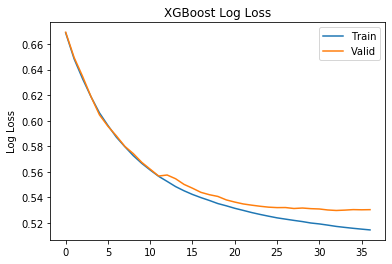

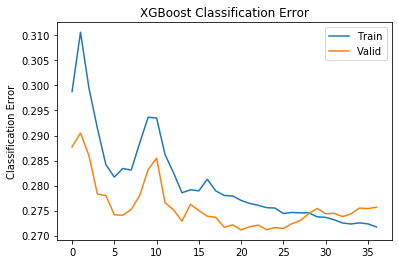

In [59]:
# retrieve performance metrics

epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Valid')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Valid')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()



# it looks like there is an opportunity to stop the learning early, perhaps somewhere around epoch 25.
# a similar story for classification error, where error appears to go back up at around epoch 25.

In [60]:
#precision
m1_predict=model1.predict(scaled_valid)
precision_score(labels_valid.iloc[:,0], m1_predict) #huge improvement 

0.460793150067598

In [61]:
#confusion matrix
confusion_matrix(valid_target1, m1_predict)

array([[33348, 11965],
       [ 4462, 10225]], dtype=int64)

## param tuning

In [64]:

model2 = xgb.XGBClassifier(
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.5,
                      objective='binary:logistic', 
                      n_estimators=30, #get the number from above train_model3
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10) #the larger the gamma the more conservative the model is

In [66]:
m2=model2.fit(scaled_train, target1,sample_weight=sample_weight, early_stopping_rounds=5, eval_metric=["error", "logloss"], 
              eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.314966	validation_0-logloss:0.689892	validation_1-error:0.305833	validation_1-logloss:0.690582
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 5 rounds.
[1]	validation_0-error:0.294236	validation_0-logloss:0.6883	validation_1-error:0.287083	validation_1-logloss:0.687972
[2]	validation_0-error:0.289606	validation_0-logloss:0.685749	validation_1-error:0.292267	validation_1-logloss:0.685403
[3]	validation_0-error:0.29018	validation_0-logloss:0.682837	validation_1-error:0.299117	validation_1-logloss:0.683198
[4]	validation_0-error:0.285525	validation_0-logloss:0.680678	validation_1-error:0.292667	validation_1-logloss:0.680717
[5]	validation_0-error:0.287128	validation_0-logloss:0.678599	validation_1-error:0.293833	validation_1-logloss:0.678593
[6]	validation_0-error:0.287161	validation_0-logloss:0.675899	validation_1-error:0.293067	validation_1-logloss:0.676018

In [67]:
#precision
m2_predict=model2.predict(scaled_valid)
precision_score(valid_target1, m2_predict) #Not as good as m1

0.4446193537102628

### GridSearch

In [39]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [35]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [37]:
from sklearn.model_selection import GridSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [ 4, 5,6]
        }

xgb_gs = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)


In [ ]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb_gs, param_distributions=params, n_iter=param_comb, scoring='precision', n_jobs=4, cv=skf.split(scaled_train, target1), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(scaled_train, target1)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


## Cross validation

In [ ]:
#scale the original dataset
scaler =  RobustScaler() #scale to ensure models are properly trained. 
scaled_train = scaler.fit_transform(train)

In [13]:
# data_dmatrix = xgb.DMatrix(data=train,label=target1) #on non-scaled data
# params = {"objective":'binary:logistic','colsample_bytree': 0.3,'learning_rate': 0.1,
#                 'max_depth': 6, 'alpha': 10}

# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
#                     num_boost_round=50,early_stopping_rounds=10,metrics="auc", as_pandas=True, seed=123)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [32]:
cv_results['test-auc-mean'].mean()

0.8620574466666665

In [27]:
model_ns = xgb.XGBClassifier()
eval_set_ns = [(train,target1), (valid, valid_target1)]
model_ns.fit(train,target1, early_stopping_rounds=5, eval_set=eval_set_ns, verbose=True)


[0]	validation_0-error:0.155464	validation_1-error:0.289767
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.152709	validation_1-error:0.278033
[2]	validation_0-error:0.147306	validation_1-error:0.22395
[3]	validation_0-error:0.147306	validation_1-error:0.22395
[4]	validation_0-error:0.147306	validation_1-error:0.22395
[5]	validation_0-error:0.147306	validation_1-error:0.22395
[6]	validation_0-error:0.147275	validation_1-error:0.223533
[7]	validation_0-error:0.147043	validation_1-error:0.223533
[8]	validation_0-error:0.147043	validation_1-error:0.223533
[9]	validation_0-error:0.146995	validation_1-error:0.223333
[10]	validation_0-error:0.147241	validation_1-error:0.2232
[11]	validation_0-error:0.147165	validation_1-error:0.2232
[12]	validation_0-error:0.147154	validation_1-error:0.222633
[13]	validation_0-error:0.146997	validation_1-error:0.223083
[14]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
from sklearn.metrics import precision_score
xgb_predict= model_ns.predict(valid)
precision_score(valid_target1, xgb_predict) #Best so far


0.5676335877862595

## CV

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model
model_ns = xgb.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model_ns, train, target1,  scoring='average_precision', cv=kfold) # on the entire dataset
print("average_precision: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

average_precision: 51.07% (0.44%)


In [31]:
ns_predict= model_ns.predict(valid)
precision_score(valid_target1, ns_predict) #pretty much the same

0.5676335877862595

In [22]:
#replicate on scaled data

In [30]:
model_sc = xgb.XGBClassifier()
eval_set = [(scaled_train,target1), (scaled_valid, valid_target1)]
model_sc.fit(train,target1, early_stopping_rounds=5, eval_set=eval_set, verbose=True)


[0]	validation_0-error:0.355544	validation_1-error:0.320367
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.353106	validation_1-error:0.319317
[2]	validation_0-error:0.353106	validation_1-error:0.319317
[3]	validation_0-error:0.353106	validation_1-error:0.319317
[4]	validation_0-error:0.353106	validation_1-error:0.319317
[5]	validation_0-error:0.353106	validation_1-error:0.319317
[6]	validation_0-error:0.156297	validation_1-error:0.244783
[7]	validation_0-error:0.239158	validation_1-error:0.27025
[8]	validation_0-error:0.156297	validation_1-error:0.244783
[9]	validation_0-error:0.229939	validation_1-error:0.27025
[10]	validation_0-error:0.226689	validation_1-error:0.27025
[11]	validation_0-error:0.226689	validation_1-error:0.27025
Stopping. Best iteration:
[6]	validation_0-error:0.156297	validation_1-error:0.244783



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [28]:
sc_predict= model_sc.predict(valid)
precision_score(valid_target1, sc_predict) #pretty much the same

NameError: name 'model_sc' is not defined

# Feature selection

In [18]:
#variaables with low variance

In [19]:
train.shape

(482697, 148)

In [23]:
#remove rows that are the same...
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X=selector.fit_transform(train)

In [24]:
len(X) #didn't change anything ...

482697

In [26]:
#set threshold to 95%
from sklearn.feature_selection import VarianceThreshold
threshold_n=0.95
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(train)
X=train[train.columns[sel.get_support(indices=True)]] 

In [27]:
X.shape #reduced it to 113

(482697, 113)